<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Project-overview" data-toc-modified-id="Project-overview-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Project overview</a></span></li><li><span><a href="#Data-import-and-preparation" data-toc-modified-id="Data-import-and-preparation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data import and preparation</a></span><ul class="toc-item"><li><span><a href="#Adding-number-of-payments-feature" data-toc-modified-id="Adding-number-of-payments-feature-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Adding number of payments feature</a></span></li><li><span><a href="#Creating-features-matrix" data-toc-modified-id="Creating-features-matrix-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Creating features matrix</a></span></li><li><span><a href="#Standarizing-and-splitting-data" data-toc-modified-id="Standarizing-and-splitting-data-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Standarizing and splitting data</a></span></li><li><span><a href="#Investigating-Bayes-Unavoidable-Error" data-toc-modified-id="Investigating-Bayes-Unavoidable-Error-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Investigating Bayes Unavoidable Error</a></span></li></ul></li><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Logistic Regression</a></span><ul class="toc-item"><li><span><a href="#Basic-model" data-toc-modified-id="Basic-model-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Basic model</a></span></li><li><span><a href="#Regression-with-Elasticnet-regularization" data-toc-modified-id="Regression-with-Elasticnet-regularization-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Regression with Elasticnet regularization</a></span></li></ul></li><li><span><a href="#Random-Forest-Classifiers" data-toc-modified-id="Random-Forest-Classifiers-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Random Forest Classifiers</a></span><ul class="toc-item"><li><span><a href="#Basic-Random-Forest" data-toc-modified-id="Basic-Random-Forest-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Basic Random Forest</a></span></li><li><span><a href="#Random-Forest-regularization" data-toc-modified-id="Random-Forest-regularization-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Random Forest regularization</a></span></li></ul></li><li><span><a href="#Support-Vector-Machines-Classifier" data-toc-modified-id="Support-Vector-Machines-Classifier-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Support Vector Machines Classifier</a></span><ul class="toc-item"><li><span><a href="#SVC-initial-model" data-toc-modified-id="SVC-initial-model-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>SVC initial model</a></span></li><li><span><a href="#SVC-hyperparameter-tuning" data-toc-modified-id="SVC-hyperparameter-tuning-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>SVC hyperparameter tuning</a></span></li></ul></li><li><span><a href="#Ensemble-Learning" data-toc-modified-id="Ensemble-Learning-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Ensemble Learning</a></span></li><li><span><a href="#Anomaly-Detection-algorithms" data-toc-modified-id="Anomaly-Detection-algorithms-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Anomaly Detection algorithms</a></span><ul class="toc-item"><li><span><a href="#Isolation-Forest" data-toc-modified-id="Isolation-Forest-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Isolation Forest</a></span></li><li><span><a href="#Anomaly-Detection-with-autoencoders" data-toc-modified-id="Anomaly-Detection-with-autoencoders-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Anomaly Detection with autoencoders</a></span></li></ul></li><li><span><a href="#Deep-Neural-Networks" data-toc-modified-id="Deep-Neural-Networks-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Deep Neural Networks</a></span></li></ul></div>

In [2]:
import pandas as pd
import numpy as np
import random as random

# plotly standard imports
import plotly.graph_objs as go
import chart_studio.plotly as py
from datetime import datetime
from datetime import timedelta  

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import tensorflow as tf
from tensorflow import keras

In [3]:
# Cufflinks wrapper on plotly
import cufflinks
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from plotly.offline import iplot
cufflinks.go_offline()

# Set global theme

import plotly.figure_factory as ff

from Custom_Functions import (append_split_class, df_to_rnn_matrix,shuffle_arrays,sequences_train_test_split,
                              precision_recall_threshold,precision_recall_curve,model_comparison_outputs,
                              prediction_df,plot_recall_surplus_train_test,plot_recall_surplus_train_test,binarize_labels,
plot_recall_vs_positives,plot_recall_surplus_regu_base,model_comparison_outputs_IF,model_comparison_outputs_Autoencoder)

In [4]:
 def model_comparison_outputs_DNN(X_train, y_train, X_test, y_test, model):
    
    df_pred_train=prediction_df(X_train,y_train,model)
    df_pred_test=prediction_df(X_test,y_test,model)
    
    df_train_pr=precision_recall_curve(df_pred_train)
    df_test_pr=precision_recall_curve(df_pred_test)
    
    return df_pred_train,df_pred_test, df_train_pr, df_test_pr
    

# Project overview

In the second part of the project we will analyze performance of a wide series of ML models. We have highly unbalanced classes - each month there are about 10x more paying clients than defaulting. Correctly predicting defaulting clients is our key goal, which make Recall obvious choice of measures. 

Furthermore we will analize all models in relation to their decision boundary rigorism represented by Positives Share - share of clients predicted as risky. We use binary classification as best measure to interpret our predictions, however choosing decision boundary is not the key task - we should compare dynamic performance of each model as function of decision boundary rigorism.

As Recall is usually growing with increased share of positives, we will also test a modified measure - Recall Surplus. Substracting Positives Share from Recall, helps us easily visualize if increase in Recall is higher than increase in share of clients classified as risky. This approach creates a clear maximum for Recall Surplus in relation to Positives Share, which will allow us to compare models, which perform best at different rigorism. 

As Share of Positives over 40% is not possible from business perspective, as it would lead to flagging to many clients as risky, in further analysis we will only focus on 0%-40% Positives Share range. 

# Data import and preparation

In [5]:
df=pd.read_excel("processed_data.xlsx")

df.drop(columns=['Unnamed: 0'],inplace=True)

df.columns

Index(['loan_ID', 'client_ID', 'sex', 'age', 'post_code', 'cash_payment',
       'initial_loan_value', 'installment_count', 'payout_date',
       'first_installment_date', 'installment', 'period', 'payment_value',
       'payment_date', 'cumulated_payments', 'expected_payment_date',
       'last_payment_period', 'last_payment_date', 'max_cumulated_payments',
       'payment_delay', 'month', 'payment_completeness', 'paid_ratio', 'year',
       'is_male', 'is_christmass_season', 'is_default', 'month_year',
       'date_bucket'],
      dtype='object')

## Adding number of payments feature

In [6]:
df_max_period=df.groupby("loan_ID")["period"].max().reset_index()
df_max_period.rename(columns={"period":'period_max'},inplace=True)

df=df.merge(df_max_period, on="loan_ID")

df.head()

,loan_ID,client_ID,sex,age,post_code,cash_payment,initial_loan_value,installment_count,payout_date,first_installment_date,...,month,payment_completeness,paid_ratio,year,is_male,is_christmass_season,is_default,month_year,date_bucket,period_max
0,20170626/13,7,Female,57,41-200,0,5872.32,24,2017-06-26,2017-07-20,...,7,1.000000,0.041667,2017,0,0,0,2017-07-01,2017-08-16 16:19:12,14
1,20170626/13,7,Female,57,41-200,0,5872.32,24,2017-06-26,2017-07-20,...,8,1.001308,0.083388,2017,0,0,0,2017-08-01,2017-09-16 08:38:24,14
2,20170626/13,7,Female,57,41-200,0,5872.32,24,2017-06-26,2017-07-20,...,9,1.001308,0.125109,2017,0,0,0,2017-09-01,2017-10-17 00:57:36,14
3,20170626/13,7,Female,57,41-200,0,5872.32,24,2017-06-26,2017-07-20,...,10,1.001308,0.166830,2017,0,0,0,2017-10-01,2017-11-16 17:16:48,14
4,20170626/13,7,Female,57,41-200,0,5872.32,24,2017-06-26,2017-07-20,...,11,1.001308,0.208551,2017,0,0,0,2017-11-01,2017-12-17 09:36:00,14


In [7]:
df.columns

Index(['loan_ID', 'client_ID', 'sex', 'age', 'post_code', 'cash_payment',
       'initial_loan_value', 'installment_count', 'payout_date',
       'first_installment_date', 'installment', 'period', 'payment_value',
       'payment_date', 'cumulated_payments', 'expected_payment_date',
       'last_payment_period', 'last_payment_date', 'max_cumulated_payments',
       'payment_delay', 'month', 'payment_completeness', 'paid_ratio', 'year',
       'is_male', 'is_christmass_season', 'is_default', 'month_year',
       'date_bucket', 'period_max'],
      dtype='object')

## Creating features matrix

In order to train ML models, we need to group time series data from multiple rows into one set of features. We will use installment index to create columns based on 2 key time series features - payment completeness and payment delay. For the purpose of this project only first 9 installments will be used to predict payment completeness for 10th installment.  

In [8]:
groupby_features=['loan_ID','client_ID', 'is_male', 'age','cash_payment','installment_count','initial_loan_value']
ts_features=['payment_completeness','payment_delay']

In [9]:
# Defining minimum client maturity for modeling purposes
min_payments=10
df_min_payments=df[df.period_max>=min_payments]
df_X=df[df.period<min_payments]
df_y=df[df.period==min_payments][["loan_ID","payment_completeness"]]
df_y.rename(columns={'payment_completeness':"y"},inplace=True)
df_X.reset_index(inplace=True)
df_y.reset_index(inplace=True)

#
col_list=groupby_features.copy()
for feature in ts_features:
    for i in range(1,min_payments):
   
        if i<10:
            col_name=feature+"_0"+str(i)
        else:
            col_name=feature+"_"+str(i)
        col_list.append(col_name)

In [10]:
df_pivot=df_X.pivot_table(index=groupby_features,columns="period",values=ts_features)
df_pivot.reset_index(inplace=True)
df_pivot.shape

(4307, 25)

In [11]:
len(col_list)

25

In [12]:
df_pivot=pd.DataFrame(df_pivot.values, columns=col_list)

df_pivot.head()

,loan_ID,client_ID,is_male,age,cash_payment,installment_count,initial_loan_value,payment_completeness_01,payment_completeness_02,payment_completeness_03,...,payment_completeness_09,payment_delay_01,payment_delay_02,payment_delay_03,payment_delay_04,payment_delay_05,payment_delay_06,payment_delay_07,payment_delay_08,payment_delay_09
0,20170626/13,7,0,57,0,24,5872.32,1,1.00131,1.00131,...,1.00131,-1,2,-2,0,-3,0,2,0,0
1,20170630/55,23,1,27,0,24,5872.32,1,1,1,...,1,2,1,4,-13,-23,-30,-33,-30,-27
2,20170630/62,34,0,61,0,24,3914.88,1.00539,1.00539,0.989517,...,1.01153,2,0,3,3,1,6,13,0,27
3,20170703/70,41,1,35,0,24,6851.28,1.00186,1.00536,0.980839,...,1.01587,2,11,1,-28,-30,-34,-35,-23,-10
4,20170703/81,44,0,69,0,24,4893.6,1,1,1,...,1,-6,-2,-2,-2,-11,0,-6,-3,3


In [13]:
df_input=df_pivot.merge(df_y[["loan_ID",'y']], on="loan_ID")

df_input.head()

,loan_ID,client_ID,is_male,age,cash_payment,installment_count,initial_loan_value,payment_completeness_01,payment_completeness_02,payment_completeness_03,...,payment_delay_01,payment_delay_02,payment_delay_03,payment_delay_04,payment_delay_05,payment_delay_06,payment_delay_07,payment_delay_08,payment_delay_09,y
0,20170626/13,7,0,57,0,24,5872.32,1,1.00131,1.00131,...,-1,2,-2,0,-3,0,2,0,0,1.001308
1,20170630/55,23,1,27,0,24,5872.32,1,1,1,...,2,1,4,-13,-23,-30,-33,-30,-27,1.000000
2,20170630/62,34,0,61,0,24,3914.88,1.00539,1.00539,0.989517,...,2,0,3,3,1,6,13,0,27,1.002881
3,20170703/70,41,1,35,0,24,6851.28,1.00186,1.00536,0.980839,...,2,11,1,-28,-30,-34,-35,-23,-10,1.050899
4,20170703/81,44,0,69,0,24,4893.6,1,1,1,...,-6,-2,-2,-2,-11,0,-6,-3,3,1.000000


In [14]:
features=df_input.columns[2:-1]
labels=df_input.columns[-1:]
features

Index(['is_male', 'age', 'cash_payment', 'installment_count',
       'initial_loan_value', 'payment_completeness_01',
       'payment_completeness_02', 'payment_completeness_03',
       'payment_completeness_04', 'payment_completeness_05',
       'payment_completeness_06', 'payment_completeness_07',
       'payment_completeness_08', 'payment_completeness_09',
       'payment_delay_01', 'payment_delay_02', 'payment_delay_03',
       'payment_delay_04', 'payment_delay_05', 'payment_delay_06',
       'payment_delay_07', 'payment_delay_08', 'payment_delay_09'],
      dtype='object')

In [15]:
X=df_input[features].values
y=df_input[labels].values

In [16]:
X.shape

(1631, 23)

In [17]:
y.shape

(1631, 1)

In [18]:
# Decision boundary for y binary class
y=np.where(y>0.2,0,1)
y=y.ravel()

## Standarizing and splitting data

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X=scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=56)

y_train.mean()

y_test.mean()

0.12193251533742332

0.12538226299694188

## Investigating Bayes Unavoidable Error

Some of defaulting clients do not show any signs of troubles with payment - they default due to events, which are not included in our data. To see what is the top recall performance we should aspire to, let's see what share of clients defaulting during 10th installment behave in normal way before. Let's assume that if a client always pays at least 95% of their installment and never delayed by more than 5 days.

In [31]:
payment_completeness_min=0.95
payment_delay_min=5
complete_payments_idx=(df_input.iloc[:,7:16]>=payment_completeness_min).sum(axis=1)==9
no_payment_delay_idx=(df_input.iloc[:,16:25]<=payment_delay_min).sum(axis=1)==9

In [53]:
no_risk_factors_idx=(no_payment_delay_idx*complete_payments_idx)


In [54]:
#Maximum possible recall
1-(no_risk_factors_idx*y.reshape(y.shape[0])).sum()/y.sum()

0.835

Out of all defaults, 16.5% did not show any signs of risk during previous installments. We can asume that this is a good representation of Bayes Error, which means 83.5% is maximum recall for an ideal model. 

# Logistic Regression

## Basic model

In [59]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression(class_weight="balanced",max_iter=1000)

In [60]:
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [61]:
log_reg_pred_train,log_reg_pred_test,log_reg_pr_train,log_reg_pr_test= model_comparison_outputs(X_train,y_train, X_test, y_test, log_reg)

plot_recall_vs_positives(log_reg_pr_test)

For the simplest model - the Logistic Regression, we can see that on test data the model is performing slightly better than a random search in whole Positives Share range. 

In [62]:
plot_recall_surplus_train_test(log_reg_pr_train,log_reg_pr_test)

Analyzing relation between Positives Share and Recall is clearer when using Recall Surplus. Modified measure removes the effect of unified Recall growth with Positives Share. 

However comparing Recall Surplus for Training and Test data, we can see clear overfitting. 

In [63]:
importance_df=pd.DataFrame(log_reg.coef_.ravel(),columns=["coefficients"])
importance_df["features"]=features
importance_df.sort_values(by="coefficients",inplace=True)

In [64]:
trace0=go.Bar(
        y=importance_df.coefficients,
        x=importance_df.features,
        
        marker=dict(
        color="blue",

        opacity=0.5
        ),
       
    )








data=[trace0]
figure=go.Figure(
    data=data,
    layout=go.Layout(
        title="Regression coefficients",
        yaxis=dict(title="coeff"),
        xaxis=dict(title="feature")

    
    ))
iplot(figure)

Analyzing Regression coefficients we can see that time series features - payment_completeness and payment_delay have highest coefficients, which can be interpreted as importance due to data Standarization. However as the regression seems to overfitt training data, regularization and limiting number of features might bring more insights. 

## Regression with Elasticnet regularization

In [65]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression(class_weight="balanced",max_iter=1000,penalty="elasticnet",solver="saga",l1_ratio=0.3, C=0.007)

In [66]:
log_reg.fit(X_train, y_train)

LogisticRegression(C=0.007, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=0.3,
                   max_iter=1000, multi_class='auto', n_jobs=None,
                   penalty='elasticnet', random_state=None, solver='saga',
                   tol=0.0001, verbose=0, warm_start=False)

In [67]:
log_reg_pred_train_1,log_reg_pred_test_1,log_reg_pr_train_1,log_reg_pr_test_1= model_comparison_outputs(X_train,y_train, X_test, y_test, log_reg)

In [68]:
plot_recall_surplus_train_test(log_reg_pr_train_1,log_reg_pr_test_1)

In [69]:
importance_df=pd.DataFrame(log_reg.coef_.ravel(),columns=["coefficients"])
importance_df["features"]=features
importance_df.sort_values(by="coefficients",inplace=True)
importance_df=importance_df[importance_df.coefficients!=0]

In [70]:
trace0=go.Bar(
        y=importance_df.coefficients,
        x=importance_df.features,
        
        marker=dict(
        color="blue",

        opacity=0.5
        ),
       
    )








data=[trace0]
figure=go.Figure(
    data=data,
    layout=go.Layout(
        title="Regression coefficients",
        yaxis=dict(title="coeff"),
        xaxis=dict(title="feature")

    
    ))
iplot(figure)

Regularization helped to limit key features only 6 features. They only include payment completness and payment delay features. These key features seem more logical as deleyed payment of 9th  installment is a clear warning sign. Payment completness features with negative signs suggest that the higher the payment, the lower chance of default. What is not clear is why coefficients for payment_completeness for 5th and 3rd installments are the highest. 

In [71]:
plot_recall_surplus_regu_base(log_reg_pr_test,log_reg_pr_test_1)

Regularization helped to improve performance across nearly whole range of Positives Share. It also smoothed out the Recall Surplus share, which is a hint that the model would generalize better and be less dependent on final decision boundary. 

# Random Forest Classifiers

## Basic Random Forest 

In [72]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(max_depth=5, random_state=0,verbose=1,class_weight="balanced",min_samples_leaf=5,min_samples_split=5)
rf_clf.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=1,
                       warm_start=False)

In [73]:
rf_clf_pred_train,rf_clf_pred_test,rf_clf_pr_train,rf_clf_pr_test= model_comparison_outputs(X_train,y_train, X_test, y_test, rf_clf)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [74]:
plot_recall_surplus_train_test(rf_clf_pr_train,rf_clf_pr_test)

Recall Surplus curve for initial Random Forest model shows extreme overfit - the performance on Training data is much higher than test data. This issue should be fixed with hyperparameter tuning and regularization. 

## Random Forest regularization

Grid search combined with cross validation helps choosing best hyperparameters, while using only training data.

In [75]:
param_grid = [
   
    
    {"class_weight":["balanced"],"bootstrap":[True,False], "n_estimators":[50,100,200],
     "max_features":[2,3,4],"max_depth":[2,3,4],"min_samples_leaf":[20,40,60],"min_samples_split":[50,100,200]},
    
]

In [76]:
from sklearn.model_selection import GridSearchCV

In [77]:
forest_cl=RandomForestClassifier (random_state=10,class_weight="balanced", n_jobs=4)

In [78]:
grid_search = GridSearchCV(forest_cl, param_grid, cv=5,
                          scoring="f1_weighted",return_train_score=True)

In [79]:
grid_search.fit(X_train, y_train)
rf_clf_best_params = grid_search.best_estimator_
grid_search.best_params_

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

{'bootstrap': True,
 'class_weight': 'balanced',
 'max_depth': 2,
 'max_features': 4,
 'min_samples_leaf': 20,
 'min_samples_split': 50,
 'n_estimators': 50}

In [80]:
#rf_clf_best_params=RandomForestClassifier(bootstrap=True, class_weight='balanced',max_depth=2,max_features=4,
#               min_samples_leaf=20,min_samples_split=50,n_estimators=50)

In [110]:
rf_clf_pred_train_1,rf_clf_pred_test_1,rf_clf_pr_train_1,rf_clf_pr_test_1= model_comparison_outputs(X_train,y_train, X_test, y_test, rf_clf_best_params)

In [111]:
plot_recall_surplus_train_test(rf_clf_pr_train_1,rf_clf_pr_test_1)

Performance on training and test data is much closer after regularization. We can also see that the Regularized model performs better than base model in key Positives Share range of 10%-25%.

In [112]:
plot_recall_surplus_regu_base(rf_clf_pr_test,rf_clf_pr_test_1)

In [113]:
importance_df=pd.DataFrame(rf_clf_best_params.feature_importances_,columns=["coefficients"])
importance_df["features"]=features
importance_df.sort_values(by="coefficients",inplace=True)

In [114]:
trace0=go.Bar(
        x=importance_df.coefficients,
        y=importance_df.features,
        orientation="h",
        
        marker=dict(
        color="blue",

        opacity=0.5
        ),
       
    )








data=[trace0]
figure=go.Figure(
    data=data,
    layout=go.Layout(
        title="Feature importance",
        xaxis=dict(title="Importance"),
        yaxis=dict(title="Feature")

    
    ))
iplot(figure)

Feature importance for final Random Forest model seem is strictly related to installment index, with payment_completness and delay for 9th and 8th installments clearly being carrying most information about defaulting risk. Initial loan value and ageare the most imporant client characteristics features, but they are behind nearly all of time series features. 

# Support Vector Machines Classifier

## SVC initial model

In [94]:
from sklearn.svm import SVC
SVC_clf = SVC(gamma="auto",class_weight="balanced",probability=True,kernel="rbf", C=0.1)
SVC_clf.fit(X_train, y_train)

SVC_clf_pred_train,SVC_clf_pred_test,SVC_clf_pr_train,SVC_clf_pr_test= model_comparison_outputs(X_train,y_train, X_test, y_test, SVC_clf)

SVC(C=0.1, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [95]:
plot_recall_surplus_train_test(SVC_clf_pr_train,SVC_clf_pr_test)

Base SVC model also show clear overfit, regularization and hyperparameter tuning is needed to avoid this issue. 

## SVC hyperparameter tuning

In [96]:
param_grid_SVM = [
#    {"class_weight":["balanced"],"probability":[True],'kernel':["poly"],"degree":[2,3,4], "coef0":[0.003,0.01,0.03,1],"C":[0.003,0.01,0.03]},
    
  {"gamma":[0.0003,0.001,0.002,0.003,0.01],"class_weight":["balanced"],"probability":[True],'kernel':["rbf"],"C":[0.8,1,1.2]},
    
]

In [97]:
grid_search_SVM = GridSearchCV(SVC_clf, param_grid_SVM, cv=5,
                          scoring="f1_weighted",return_train_score=True)

In [98]:
grid_search_SVM.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=0.1, break_ties=False, cache_size=200,
                           class_weight='balanced', coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.8, 1, 1.2], 'class_weight': ['balanced'],
                          'gamma': [0.0003, 0.001, 0.002, 0.003, 0.01],
                          'kernel': ['rbf'], 'probability': [True]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='f1_weighted', verbose=0)

C value and gamma are key parameters used for regularizing SVM models. In both cases lower values regularize model further. 

In [99]:
grid_search_SVM.best_params_

{'C': 1,
 'class_weight': 'balanced',
 'gamma': 0.001,
 'kernel': 'rbf',
 'probability': True}

In [100]:
SVC_clf_best_params = grid_search_SVM.best_estimator_

In [101]:
y=SVC_clf_best_params.predict_proba(X_test)

In [102]:
SVC_clf_pred_train_1,SVC_clf_pred_test_1,SVC_clf_pr_train_1,SVC_clf_pr_test_1= model_comparison_outputs(X_train,y_train, X_test, y_test, SVC_clf_best_params)

plot_recall_surplus_train_test(SVC_clf_pr_train_1,SVC_clf_pr_test_1)

Regularization allowed to slightly reduce overfitting but the model is still far from perfect. 

In [103]:
plot_recall_surplus_regu_base(SVC_clf_pr_test,SVC_clf_pr_test_1)

Regularized model is similar in performance to base model but its Recall Surplus curve is smoother, which suggests better generalization and lower dependence on decision boundary. 

# Ensemble Learning

Combining 3 previous models into an Ensemble Model can provide results better than ever the best models included in ensemble. We will use an average prediction from these 3 models. 

In [104]:
def mean_ensemble(X,y,model_list):
    proba_arr=np.ones([X.shape[0],len(model_list)])
    
    for i in range(0, len(model_list)):
        proba_arr[:,i]=model_list[i].predict_proba(X)[:,1]
        
    y_pred=proba_arr.mean(axis=1)
    
    df_pred=pd.DataFrame(y_pred,columns=["y_pred"])
    df_pred["y_true"]=pd.DataFrame(y) 
    df_pred["ones"]=1
    df_pred.sort_values(by="y_true", inplace=True)
    df_pred["true_rank"]=df_pred.ones.cumsum()
    df_pred.sort_values(by="y_pred", inplace=True)
    df_pred["pred_rank"]=df_pred.ones.cumsum()

    df_pred.drop(columns="ones",inplace=True)
    
    return(df_pred)
    

In [105]:
#Selecting models to be used in ensemble
model_list=[rf_clf_best_params,log_reg,SVC_clf_best_params]

In [106]:
df_ensemble_train=mean_ensemble(X_train,y_train,model_list)
df_ensemble_test=mean_ensemble(X_test,y_test,model_list)

In [107]:
df_ensemble_train_pr=precision_recall_curve(df_ensemble_train)
df_ensemble_test_pr=precision_recall_curve(df_ensemble_test)

In [108]:
plot_recall_surplus_train_test(df_ensemble_train_pr,df_ensemble_test_pr)

The ensemble model avoids overfitting, as it combines 3 regularized models into an average vote. 

In [115]:
    trace0=go.Scatter(
            y=log_reg_pr_test.recall-log_reg_pr_test.positives_share,
            x=log_reg_pr_test.positives_share,
            mode='lines',
            marker=dict(
            color="blue",
            size=5,
            opacity=0.5
            ),
            name="Logistic regression"
        )

    trace1=go.Scatter(
            y=rf_clf_pr_test_1.recall-rf_clf_pr_test_1.positives_share,
            x=rf_clf_pr_test_1.positives_share,
            mode='lines',
            marker=dict(
            color="green",
            size=5,
            opacity=0.5
            ),
            name="Random Forest"
        )

    trace2=go.Scatter(
            y=SVC_clf_pr_test_1.recall-SVC_clf_pr_test_1.positives_share,
            x=SVC_clf_pr_test_1.positives_share,
            mode='lines',
            marker=dict(
            color="red",
            size=5,
            opacity=0.5
            ),
            name="SVM"
        )


    trace3=go.Scatter(
            y=df_ensemble_test_pr.recall-df_ensemble_test_pr.positives_share,
            x=df_ensemble_test_pr.positives_share,
            mode='lines',
            marker=dict(
            color="orange",
            size=10,
            opacity=0.5
            ),
            name="Ensemble Model"
        )

    



    data=[trace0, trace1,trace2,trace3]
    figure=go.Figure(
        data=data,
        layout=go.Layout(
            title="Recall Surplus in relation to Positives Share",
            yaxis=dict(title="Recall Surplus"),
            xaxis=dict(title="Positives Share",range=[0,0.4]),
            legend=dict(
                x=0.77,
                y=0,
                traceorder="normal",
                font=dict(
                    family="sans-serif",
                    size=12,
                    color="black"
                ),
            bgcolor=None


        )))
    iplot(figure)

Ensemble model outperforms best component model - Random Forest in higher ranges of Positives Share range. Its Recall Surplus curve is also smoother and has less local maximums than Random Forest. 

# Anomaly Detection algorithms

Anomaly detection can be used to validate if defaulting clients can be sorted out as outliers. This approach can be effective as we have unbalanced classes. 

As anomaly detection is Unsupervised Learning, the models will use only X values during training. y will be used only to validate results. This will probably mean worse performance to analzyed Supervised Learning models, as they can also learn from information in training set y's. The problem is that we can only flag outliers, but we cannot be sure if the definition of ouutlier is similar to defaulting clients, as these labels are not used during training. 

## Isolation Forest

In [67]:
from sklearn.ensemble import IsolationForest
Isolation_Forest=IsolationForest(n_estimators=100,max_samples="auto",random_state=40,bootstrap=True,
                         contamination=y_train.mean(),max_features=4)


Isolation_Forest.fit(X_train)

IF_pred_train,IF_pred_test,IF_pr_train,IF_pr_test= model_comparison_outputs_IF(X_train,y_train, X_test, y_test, Isolation_Forest)

plot_recall_surplus_train_test(IF_pr_train,IF_pr_test)

IsolationForest(behaviour='deprecated', bootstrap=True,
                contamination=0.12193251533742332, max_features=4,
                max_samples='auto', n_estimators=100, n_jobs=None,
                random_state=40, verbose=0, warm_start=False)

Isolation Forest - a model similar to Random Forest seems to perform close to Logistic Regression but is much worse than all other analyzed models. 

## Anomaly Detection with autoencoders

In [122]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import regularizers

input_dim=int(X.shape[1])
encoding_dim=int(input_dim/3)
hidden_dim=int(encoding_dim/3)
n_epochs=100

Using Autoencoder based on DNN as anomaly detection algorithm allows to spot advanced patterns to filter out outliers. As all information is compressed into just 2 neurons inside the hidden dimensions, only the data which fitts the overall patterns will have low reproduction errors. 

In [123]:
hidden_dim

2

In [124]:
model=keras.models.Sequential([

    keras.layers.Dense(input_shape=[input_dim ],units=encoding_dim, activation='tanh'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=hidden_dim, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=encoding_dim, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=input_dim, activation='tanh'),



])

In [125]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 7)                 168       
_________________________________________________________________
dropout_3 (Dropout)          (None, 7)                 0         
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 16        
_________________________________________________________________
dropout_4 (Dropout)          (None, 2)                 0         
_________________________________________________________________
dense_6 (Dense)              (None, 7)                 21        
_________________________________________________________________
dropout_5 (Dropout)          (None, 7)                 0         
_________________________________________________________________
dense_7 (Dense)              (None, 23)               

In [126]:
optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=optimizer, 
                    loss='mean_squared_error', 
                    metrics=['accuracy'])

In [127]:
history = model.fit(X_train, X_train,
                    epochs=n_epochs,
                    batch_size=50,
                    validation_data=(X_test, X_test),
                    verbose=1)

Train on 1304 samples, validate on 327 samples
Epoch 1/100
1304/1304 [==============================] - 3s 2ms/sample - loss: 1.1081 - accuracy: 0.0483 - val_loss: 0.8876 - val_accuracy: 0.1529
Epoch 2/100
1304/1304 [==============================] - 0s 133us/sample - loss: 1.0897 - accuracy: 0.0560 - val_loss: 0.8796 - val_accuracy: 0.1988
Epoch 3/100
1304/1304 [==============================] - 0s 126us/sample - loss: 1.0722 - accuracy: 0.1342 - val_loss: 0.8762 - val_accuracy: 0.1468
Epoch 4/100
1304/1304 [==============================] - 0s 127us/sample - loss: 1.0635 - accuracy: 0.1258 - val_loss: 0.8742 - val_accuracy: 0.1346
Epoch 5/100
1304/1304 [==============================] - 0s 130us/sample - loss: 1.0544 - accuracy: 0.1204 - val_loss: 0.8737 - val_accuracy: 0.1254
Epoch 6/100
1304/1304 [==============================] - 0s 107us/sample - loss: 1.0492 - accuracy: 0.1357 - val_loss: 0.8738 - val_accuracy: 0.1284
Epoch 7/100
1304/1304 [==============================] - 0s 1

1304/1304 [==============================] - 0s 98us/sample - loss: 0.9675 - accuracy: 0.1181 - val_loss: 0.7760 - val_accuracy: 0.1193
Epoch 56/100
1304/1304 [==============================] - 0s 105us/sample - loss: 0.9754 - accuracy: 0.0629 - val_loss: 0.7745 - val_accuracy: 0.0520
Epoch 57/100
1304/1304 [==============================] - 0s 89us/sample - loss: 0.9660 - accuracy: 0.0621 - val_loss: 0.7720 - val_accuracy: 0.1131
Epoch 58/100
1304/1304 [==============================] - 0s 113us/sample - loss: 0.9755 - accuracy: 0.0951 - val_loss: 0.7696 - val_accuracy: 0.1193
Epoch 59/100
1304/1304 [==============================] - 0s 100us/sample - loss: 0.9801 - accuracy: 0.0752 - val_loss: 0.7708 - val_accuracy: 0.0612
Epoch 60/100
1304/1304 [==============================] - 0s 98us/sample - loss: 0.9770 - accuracy: 0.1104 - val_loss: 0.7736 - val_accuracy: 0.1162
Epoch 61/100
1304/1304 [==============================] - 0s 94us/sample - loss: 0.9844 - accuracy: 0.1242 - val_los

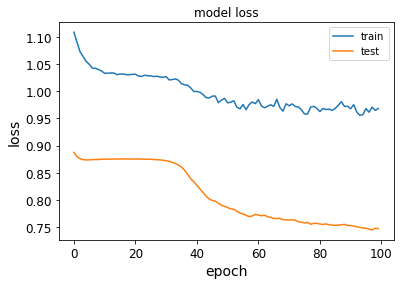

In [128]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

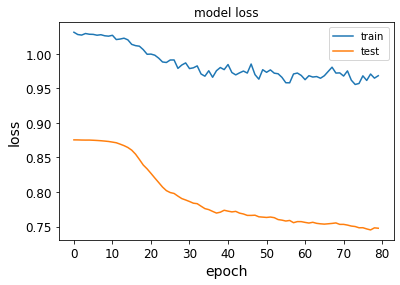

In [129]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'][20:])
plt.plot(history.history['val_loss'][20:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [130]:
AC_pred_train,AC_pred_test,AC_pr_train,AC_pr_test= model_comparison_outputs_Autoencoder(X_train,y_train, X_test, y_test, model)

plot_recall_surplus_train_test(AC_pr_train,AC_pr_test)

Using drop-out between each layer allowed to avoid overfitting, while still achiewing good performance. Despite using advanced model such as autoencoder for outlier detection, still the results do not reach the recall surplus of linear regression. This suggests that the Anomaly Detection approach is not the best solution for our problem. 

# Deep Neural Networks

As it can be trained on same data as other models, we will finish this stage of the project with a fully conected Deep Neural Network. We will use 3 hidden layers with Dropout to avoid overfitting. 

In [132]:
tf.keras.backend.clear_session()
tf.random.set_seed(60)

DNN=keras.models.Sequential([
    keras.layers.Dense(input_shape=[input_dim ],units=40, activation='tanh'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=20, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=10, activation='relu'),
    keras.layers.Dense(units=1, activation="sigmoid"),



])

In [133]:
DNN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 40)                960       
_________________________________________________________________
dropout (Dropout)            (None, 40)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                820       
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 2,001
Trainable params: 2,001
Non-trainable params: 0
______________________________________________________

In [134]:
lr_schedule = keras.callbacks.LearningRateScheduler(
    lambda epoch:0.001*(epoch /10))

optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="mse", optimizer=optimizer)

optimizer = keras.optimizers.Adam(lr=0.0004)
DNN.compile(optimizer=optimizer, 
                    loss='mean_squared_error', 
                    metrics=['accuracy'])


history = DNN.fit(X_train, y_train,
                    epochs=100,
                    validation_data=(X_test, y_test),
                    verbose=1)

Train on 1304 samples, validate on 327 samples
Epoch 1/100
1304/1304 [==============================] - 1s 656us/sample - loss: 0.2461 - accuracy: 0.5629 - val_loss: 0.2197 - val_accuracy: 0.7003
Epoch 2/100
1304/1304 [==============================] - 0s 137us/sample - loss: 0.2066 - accuracy: 0.7071 - val_loss: 0.1862 - val_accuracy: 0.8257
Epoch 3/100
1304/1304 [==============================] - 0s 130us/sample - loss: 0.1742 - accuracy: 0.7860 - val_loss: 0.1626 - val_accuracy: 0.8532
Epoch 4/100
1304/1304 [==============================] - 0s 181us/sample - loss: 0.1576 - accuracy: 0.8336 - val_loss: 0.1469 - val_accuracy: 0.8685
Epoch 5/100
1304/1304 [==============================] - 0s 129us/sample - loss: 0.1483 - accuracy: 0.8551 - val_loss: 0.1346 - val_accuracy: 0.8716
Epoch 6/100
1304/1304 [==============================] - 0s 152us/sample - loss: 0.1338 - accuracy: 0.8704 - val_loss: 0.1263 - val_accuracy: 0.8746
Epoch 7/100
1304/1304 [==============================] - 0s

1304/1304 [==============================] - 0s 160us/sample - loss: 0.1049 - accuracy: 0.8773 - val_loss: 0.1026 - val_accuracy: 0.8746
Epoch 56/100
1304/1304 [==============================] - 0s 233us/sample - loss: 0.1046 - accuracy: 0.8788 - val_loss: 0.1026 - val_accuracy: 0.8746
Epoch 57/100
1304/1304 [==============================] - 0s 155us/sample - loss: 0.1043 - accuracy: 0.8750 - val_loss: 0.1023 - val_accuracy: 0.8746
Epoch 58/100
1304/1304 [==============================] - 0s 141us/sample - loss: 0.1066 - accuracy: 0.8796 - val_loss: 0.1025 - val_accuracy: 0.8746
Epoch 59/100
1304/1304 [==============================] - 0s 157us/sample - loss: 0.1058 - accuracy: 0.8788 - val_loss: 0.1026 - val_accuracy: 0.8746
Epoch 60/100
1304/1304 [==============================] - 0s 184us/sample - loss: 0.1031 - accuracy: 0.8788 - val_loss: 0.1027 - val_accuracy: 0.8746
Epoch 61/100
1304/1304 [==============================] - 0s 146us/sample - loss: 0.1016 - accuracy: 0.8788 - val

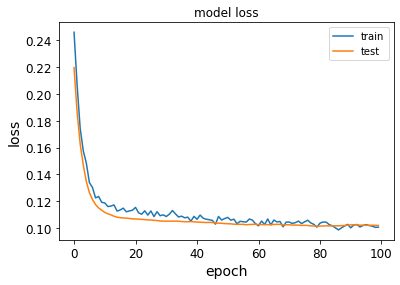

In [135]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

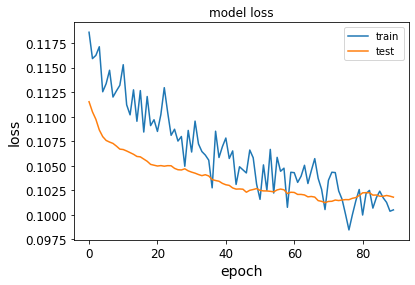

In [136]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'][10:])
plt.plot(history.history['val_loss'][10:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [137]:
DNN_pred_train,DNN_pred_test,DNN_pr_train,DNN_pr_test= model_comparison_outputs_DNN(X_train,y_train, X_test, y_test, DNN)

In [138]:
plot_recall_surplus_train_test(DNN_pr_train,DNN_pr_test)

We can see some risk of overfitting the training data, as Recall Surplus curve is much steeper for training data compared to testing. Although the gap closes for higher Positives Share.

In [139]:
    trace1=go.Scatter(
            y=rf_clf_pr_test_1.recall-rf_clf_pr_test_1.positives_share,
            x=rf_clf_pr_test_1.positives_share,
            mode='lines',
            marker=dict(
            color="green",
            size=5,
            opacity=0.5
            ),
            name="Random Forest"
        )

    trace2=go.Scatter(
            y=DNN_pr_test.recall-DNN_pr_test.positives_share,
            x=DNN_pr_test.positives_share,
            mode='lines',
            marker=dict(
            color="blue",
            size=5,
            opacity=0.5
            ),
            name="DNN"
        )


    trace3=go.Scatter(
            y=df_ensemble_test_pr.recall-df_ensemble_test_pr.positives_share,
            x=df_ensemble_test_pr.positives_share,
            mode='lines',
            marker=dict(
            color="orange",
            size=10,
            opacity=0.5
            ),
            name="Ensemble Model"
        )

    



    data=[trace1,trace2,trace3]
    figure=go.Figure(
        data=data,
        layout=go.Layout(
            title="Recall surplus in relation to Positives Share",
            yaxis=dict(title="Recall surplus"),
            xaxis=dict(title="Positives share",range=[0,0.4]),
            legend=dict(
                x=0.77,
                y=0,
                traceorder="normal",
                font=dict(
                    family="sans-serif",
                    size=12,
                    color="black"
                ),
            bgcolor=None


        )))
    iplot(figure)

Deep Neural Network performed well in higher Positives Share ranges but for decision boundary with Positives Share < 15% it was outperformed by both Random Forest and Ensemble Model. As most of the information is contained within time series data, there is a big chance that RNN will have better performance, due to better ability to spot relational patters between time series data. 

In [140]:
rf_clf_pr_test_1.to_excel("Random_Forest_summary.xlsx")

df_ensemble_test_pr.to_excel("Ensemble_summary.xlsx")

DNN_pr_test.to_excel("DNN_summary.xlsx")